In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# 
# plt.figure(figsize=(10, 5.625))
run = 1
# Вариант 8. Гаврилов Никита
k = 1.38*10**-23
T_0 = 17 + 273.15
W = 3*10**6

N_T = k*T_0*W
N_T_dBm = 10*math.log10(N_T/0.001)

deltaP_n_dB = 35

P_n_dBm = N_T_dBm + deltaP_n_dB
print(N_T)
print(f'{N_T_dBm} {P_n_dBm}')


1.2012209999999997e-14
-109.20377083978552 -74.20377083978552


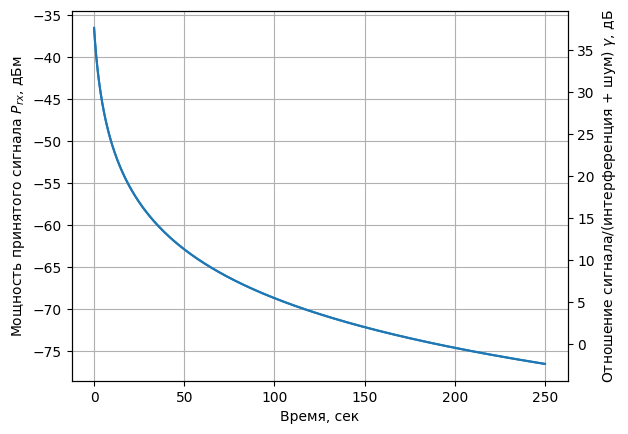

In [7]:
receptionPower = pd.read_csv(f'{run}/receptionPower.csv', sep=',', header=None)
receptionPower_dBm = receptionPower
receptionPower_dBm[1] = 10*np.log10(receptionPower_dBm[1]/0.001)

minSnir = pd.read_csv(f'{run}/minSnir.csv', sep=',', header=None)
minSnir_dB = minSnir
minSnir_dB[1] = 10*np.log10(minSnir[1])


fig, ax1 = plt.subplots()
ax1.set_xlabel('Время, сек')
ax1.set_ylabel('Мощность принятого сигнала $P_{rx}$, дБм')
ax1.plot(receptionPower[0], receptionPower[1])
ax1.tick_params(axis='y')
ax1.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('Отношение сигнала/(интерференция + шум) $\gamma$, дБ')
ax2.tick_params(axis='y')
ax2.plot(minSnir_dB[0], minSnir_dB[1])
# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

plt.savefig(f'{run}/plot1.png')
# figp = make_subplots(specs=[[{"secondary_y": True}]])
# figp.add_trace(
#     go.Scatter(x=receptionPower[0], y=receptionPower[1], name="yaxis data"),
#     secondary_y=False,
# )
# figp.add_trace(
#     go.Scatter(x=minSnir_dB[0], y=minSnir_dB[1], name="yaxis2 data"),
#     secondary_y=True,
# )

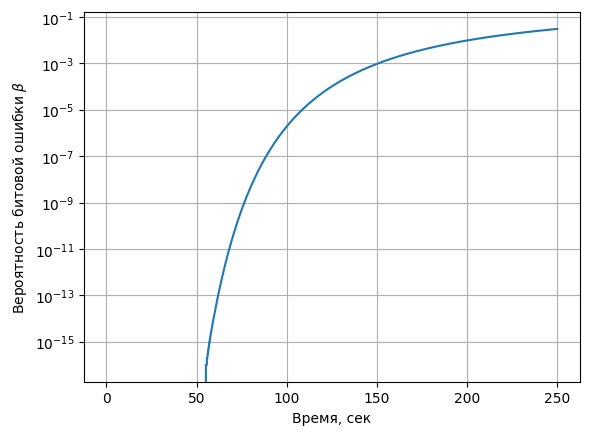

In [8]:
bitErrorRate = pd.read_csv(f'{run}/bitErrorRate.csv', sep=',', header=None)

fig, ax3 = plt.subplots()


ax3.set_xlabel('Время, сек')
ax3.set_ylabel('Вероятность битовой ошибки $\\beta$')
ax3.set_yscale('log')
# ax3.set_ylim([10**-15, 1])
ax3.plot(bitErrorRate[0], bitErrorRate[1])
ax3.grid()
plt.savefig(f'{run}/plot2.png')


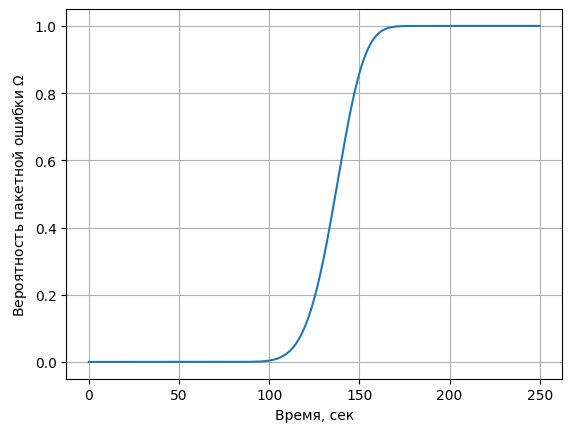

In [9]:
packetErrorRate = pd.read_csv(f'{run}/packetErrorRate.csv', sep=',', header=None)

fig, ax4 = plt.subplots()


ax4.set_xlabel('Время, сек')
ax4.set_ylabel('Вероятность пакетной ошибки $\Omega$')
ax4.plot(packetErrorRate[0], packetErrorRate[1])
ax4.grid()
plt.savefig(f'{run}/plot3.png')


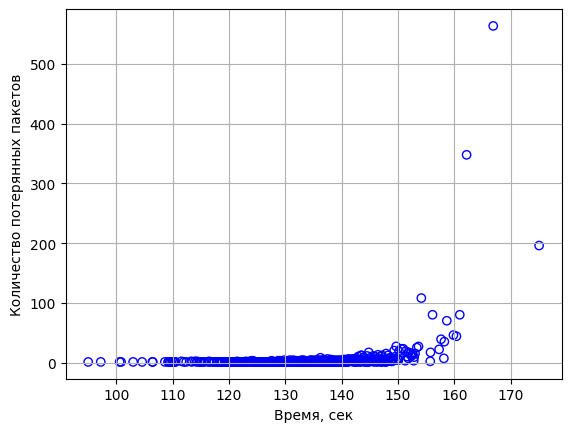

In [10]:
rcvdPkSeqNo = pd.read_csv(f'{run}/rcvdPkSeqNo.csv', sep=',', header=None)

lostPackets = rcvdPkSeqNo
lostPackets[1] = rcvdPkSeqNo[1].shift(-1) - rcvdPkSeqNo[1] - 1
lostPackets = lostPackets.drop(lostPackets[lostPackets[1]==0].index)

fig, ax5 = plt.subplots()

ax5.set_xlabel('Время, сек')
ax5.set_ylabel('Количество потерянных пакетов')
ax5.scatter(lostPackets[0], lostPackets[1], facecolors='none', edgecolors='blue')
# ax5.set_xlim([25, 45])
# ax5.set_ylim([0, 80])
ax5.grid()
plt.savefig(f'{run}/plot4.png')

Analytic

In [3]:
import math
import scipy as sp
v = 2
d0 = 5
p_t = 0.090
p_n = -74.2 # дБм
R = 1000000
W = 3000000
L_phy = 200 + 59

absolute_p_n = 10 ** ((p_n - 35) / 10) #из дБм в Вт/мВт

c = 299792458
fc = 3000000000
lamb = c / fc #длина волны

send_interval = 0.015 # sec
time_limit = 250

times = np.array([0])
while (times[-1] < time_limit):
    new_time = times[-1] + np.random.exponential(send_interval)
    times = np.append(times, new_time)
print(len(times))

d_t = times * v + d0
power = ((lamb / (4 * math.pi * d_t)) ** 2) * p_t

gamma = power / absolute_p_n/np.sqrt(10)
# print(gamma)
bit_err = sp.special.erfc(np.sqrt(gamma * (W / R))) / 2

bit_err = np.round(bit_err, 14)

packet_err = 1 - (1 - bit_err) ** (8 * L_phy)


log_power = 10 *np.log10(power * 1000) # переводим Вт в мВт и потом в Дбм

16265


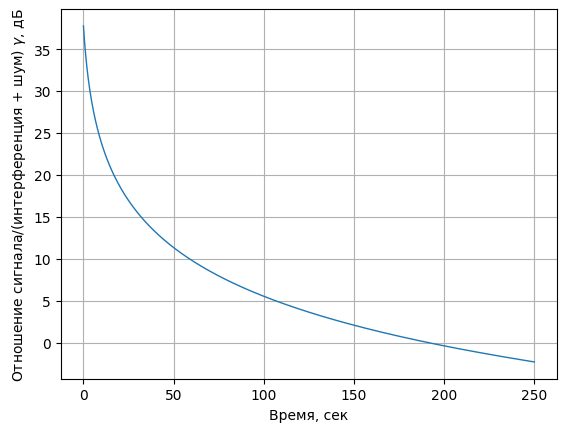

In [11]:
plt.figure()

log_g = 10 *np.log10(gamma)
plt.plot(times, log_g, linewidth=1)

x_ticks_step = 50  # шаг сетки
plt.xticks(np.arange(min(times), max(times), x_ticks_step))
plt.grid()
plt.xlabel('Время, сек')
plt.ylabel('Отношение сигнала/(интерференция + шум) $\gamma$, дБ')
plt.savefig(f'2/plot5.png')
plt.show()


<Figure size 640x480 with 0 Axes>

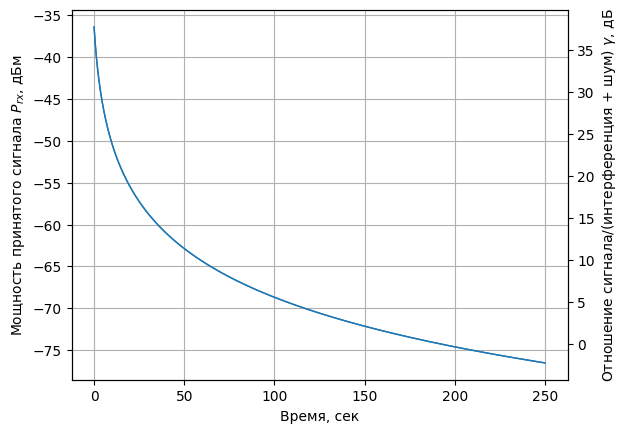

In [16]:
plt.figure()


afig, aax1 = plt.subplots()
aax2 = aax1.twinx()
aax1.plot(times, log_power, linewidth=1)
aax2.plot(times, log_g, linewidth=1)
x_ticks_step = 50
aax1.set_xticks(np.arange(min(times), max(times), x_ticks_step))
# x_ticks_step = 20  # шаг сетки
plt.xticks(np.arange(min(times), max(times), x_ticks_step))
aax1.grid(which='both')
aax1.set_xlabel('Время, сек')
aax1.set_ylabel('Мощность принятого сигнала $P_{rx}$, дБм')
aax2.set_ylabel('Отношение сигнала/(интерференция + шум) $\gamma$, дБ')
plt.savefig(f'2/plot6.png')
plt.show()


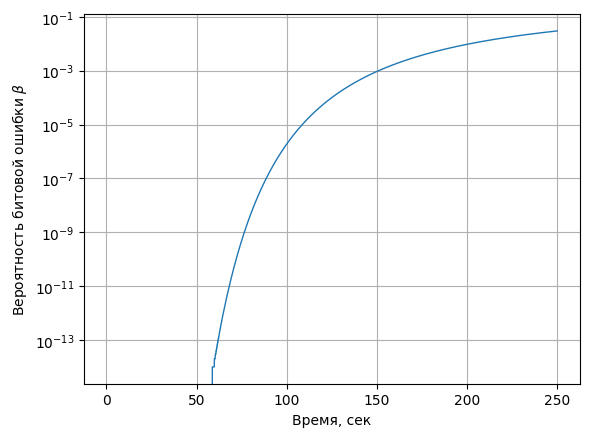

In [7]:
# Чтение данных из CSV файла
data = pd.read_csv('2/bitErrorRate.csv', header=None, sep=',')


plt.figure()
plt.semilogy(times, bit_err, linewidth=1)

x_ticks_step = 50  # Установка шага
plt.xticks(np.arange(min(data[0]), max(data[0]) + x_ticks_step, x_ticks_step))
plt.grid(which='both')

plt.xlabel('Время, сек')
plt.ylabel('Вероятность битовой ошибки $\\beta$')
plt.yscale('log')
plt.savefig(f'2/plot7.png')
plt.show()


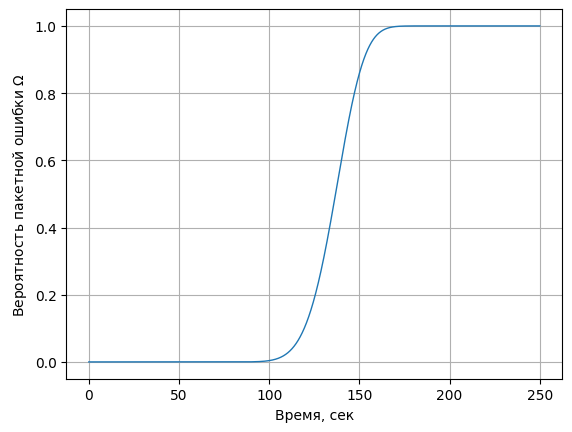

In [10]:
plt.figure()
plt.plot(times, packet_err, linewidth=1)

x_ticks_step = 50  # Установка шага
plt.xticks(np.arange(min(times), max(times), x_ticks_step))
plt.grid()
plt.xlabel('Время, сек')
plt.ylabel('Вероятность пакетной ошибки $\Omega$')
plt.savefig(f'2/plot8.png')
plt.show()
